In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import random
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
from IPython.display import display, Markdown
plt.rcParams.update({'font.size':15})
from IPython.display import display, Markdown
import time as time


## Haynes-Shockley Computational
### Drift velocity and Mobility ($\mu$)

In [24]:
d_3 = 375e-6 # Distance between emitter and C3
L = 950e-6
mu = 1e3
V = np.linspace(0.1, 2.5, 1001)
t = []
t_inv = []
for i in range(len(V)):
    t.append((d_3*L)/(mu*V[i]))

for i in range(len(V)):
    t_inv.append((mu*V[i])/(d_3*L))

### Carrier Diffusion

Einstein diffusion equation gives
\begin{equation}
D = \frac{\mu k_B T}{q}
\end{equation}

In [25]:
k_b = 1.38e-23
q = 1.6e-19
mu = 1e3
T = np.linspace(0,373, 373)
D = []
for i in range(len(T)):
    D.append((mu*k_b*T[i])/q)
    i+=1

### 1D Random walk model for electron diffusion
As predicted dy the drude theory, electrons in a conductor act as a classical ideal gas. It is modelled that they. diffuse through the material from a high to low concentration with a Gaussian distribution, this can be modelled with a 1D random walk model.
A particle is able to either take 1 arbitrary step forwards or backwards, each with an equal probability of occurring. Analogous to a coin toss, the program will select 1 of 2 numbers at random (either 0 or 1) 1000 times. If the number is 0, one step back and vise versa. The simulation is run 100 times.

In [26]:
results = []
x_pos=[]
n = np.linspace(0, 1000, 1001)
def randomwalk(n):
    x = 0
    x_pos = [x]
    for _ in range(len(n)-1):
        step = random.randint(0,1)
        if step:
            x += 1
        else:
            x -= 1
        x_pos.append(x)
    return x_pos

x_pos = randomwalk(n)
iterations = 100
tests = []
for _ in range(iterations):
    tests.append(randomwalk(n))

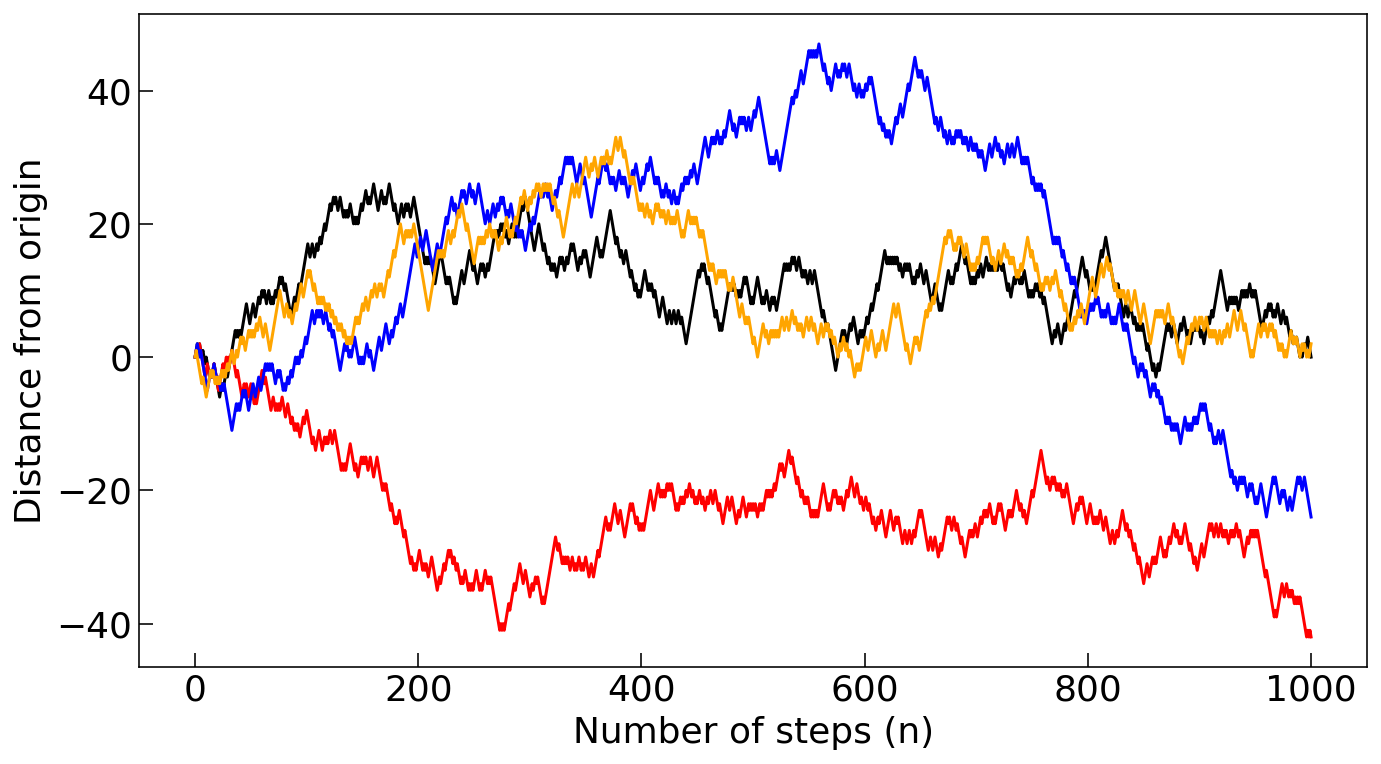

In [27]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1,1,1)
    
ax.errorbar(n, tests[0], color='black', ecolor='black')
ax.errorbar(n, tests[1], color='red', ecolor='black')
ax.errorbar(n, tests[2], color='blue', ecolor='black')
ax.errorbar(n, tests[3], color='orange', ecolor='black')

plt.tick_params(direction='in', length=7)

plt.rcParams.update({'font.size':18})
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(18)


ax.set_xlabel('Number of steps (n)', fontsize="18")
ax.set_ylabel('Distance from origin', fontsize="18")

ax.tick_params(direction='in', length=7)
plt.savefig('Random Walk.png')
plt.show()

The figure shows the path taken by a particle for the first 4 iterations of the random walk. If we normalise this and find a distribution, we get a Gaussian shape.

In [30]:
import plotly.graph_objects as go
import numpy as np

l = 1000
iterations = 10000
steps = np.random.choice([-1, 1], size=(iterations, l)) + 0.05 * np.random.standard_normal((iterations, l)) # l steps
position = np.cumsum(steps, axis=1) # integrate all positions by summing steps values along time axis

fig = go.Figure(data=go.Histogram(x=position[:, -1]))
fig.update_layout(
    xaxis_title='Distance from origin', 
    yaxis_title='Number of steps (n)',
    font=dict(size=30) # set font size to 18
)
fig.show()
fig.write_image("random_walk.png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


### Comparing data to computational

\begin{equation}
n_{mean}(x,t) = \frac{A}{\sqrt{4\pi Dt}}e^\frac{-t}{\tau}e^\frac{-x^2}{4Dt}
\end{equation}
D IS DIFFUSION CONSTANT!
$\mu^2 E^2\tau >> 4D$
L=$\mu Et_c$ = v$t_c$
$\mu$ = $\frac{L}{Et_c}$ = $\frac{1}{Vt_c}$
V$\mu$ = $t_c^2$

$\mu$, D and $\tau$ are to be experimentally determined

In [ ]:
from matplotlib.animation import FuncAnimation

mu = 1e-1
tau = 10e-6
kB = 1.38e-23
T = 293
q = 1.6e-19
D = mu*kB*T/q
N = 1000

t_ini = tau/N
t_final = tau*1.5
dt = 1e-8
xmin = -300e-6
xmax = -xmin

x = np.arange(xmin, xmax, (xmax-xmin)/N)
fig, ax = plt.subplots(figsize=(22, 12))
ax.set_xlabel('Position x / $\mu$m', fontsize="18")
ax.set_ylabel('Minority charge population $n_mean$')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, 'r-')
ax.set_ylim(0, 50000)
ax.set_xlim(xmin,xmax)


def solution(t):
    P = (1/np.sqrt(4*np.pi*D*t))*np.exp(-x**2/(4*D*t))*np.exp(-t/tau)
    return P

def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    #ax.relim() # use if autoscale desired
   # ax.autoscale()
    return [plotLine,plotTitle]

ani = FuncAnimation(fig, func=animate, frames=np.arange(t_ini, tau*1.5+dt, dt), blit=True)
plt.show()
ani.save("gaussian.gif", fps=20)

In [ ]:
from matplotlib.animation import FuncAnimation

pi = np.pi
xmin = 0.0
xmax = 10.0
N = 100 #number of points
x = np.arange(xmin, xmax , (xmax-xmin)/N)

t_initial = 0.1
t_final = 10.0
dt = 0.1
k = 1.0

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, 'r-')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,1.)
ax.set_xlim(xmin,xmax)


def solution(t):
    p = np.exp(-x**2/(4*k*t))/(np.sqrt(4.*pi*k*t))
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"t = {t:.1f}")
    ax.relim() # use if autoscale desired
    ax.autoscale()
    return [plotLine,plotTitle]



ani = FuncAnimation(fig, func=animate, frames=np.arange(t_initial, t_final+dt, dt), blit=True)
plt.show()
ani.save("gaussian.gif")

https://stackoverflow.com/questions/54464350/matplotlib-animation-with-time-dependent-parameter